In [44]:
#Taller 11
#Paula Pabon

In [31]:
import pandas as pd

data = pd.read_csv("C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/dialogos.csv")
data.head()



,Locución
0,Francamente no
1,"Lo del canadiense. Por favor, como que vosotro..."
2,Tienes razón. A lo mejor así te liberas de tu ...
3,"Pues, tú sabrás"
4,Para mí que fue Krieger


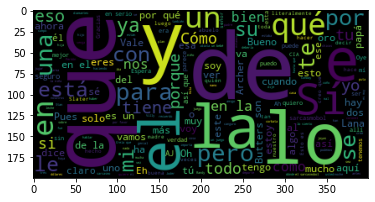

In [32]:

import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display


palabras = data.Locución.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()


In [45]:
import re 

stopwords.extend(["https", "co", "día", "dia", "madres", "madre"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Locución.apply(lambda texto: pre_procesado(texto))

data.head()



,Locución,pp
0,Francamente no,francamente
1,"Lo del canadiense. Por favor, como que vosotro...",canadiense favor tiraríais allí si pudieseis
2,Tienes razón. A lo mejor así te liberas de tu ...,razón mejor así liberas energía nagativa
3,"Pues, tú sabrás",pues sabrás
4,Para mí que fue Krieger,krieger


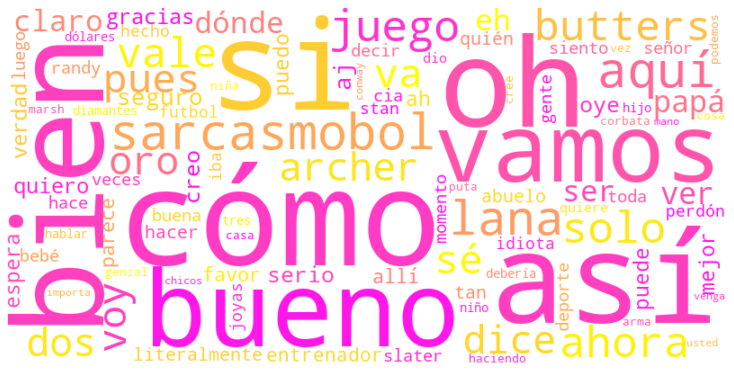

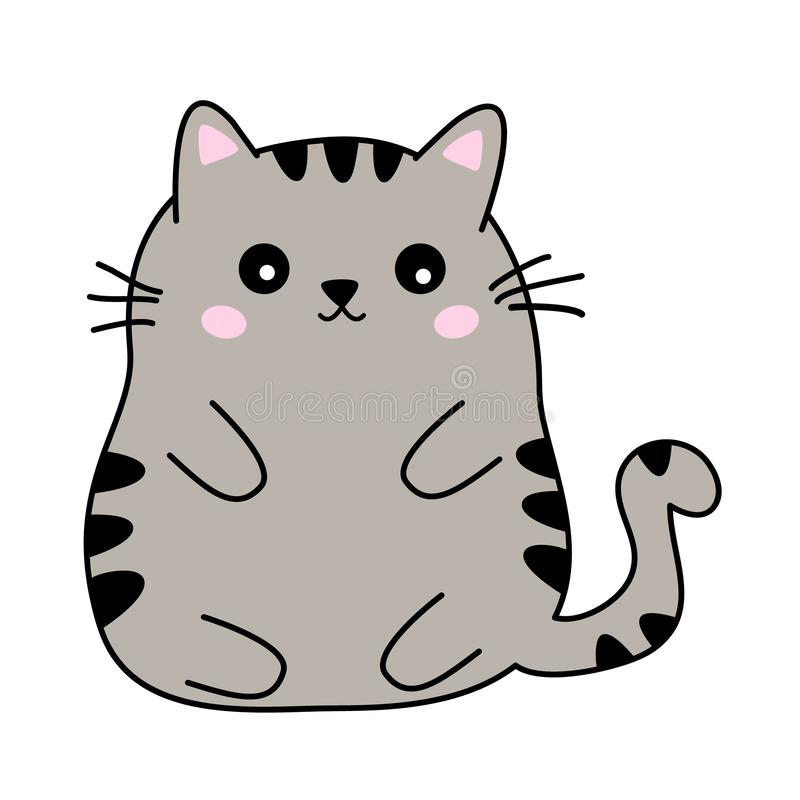

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [46]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras)
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# CARGAR IMAGEN 
img = PIL.Image.open("C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/cat.jpg")
display(img)
  
mask = np.array(img)
mask


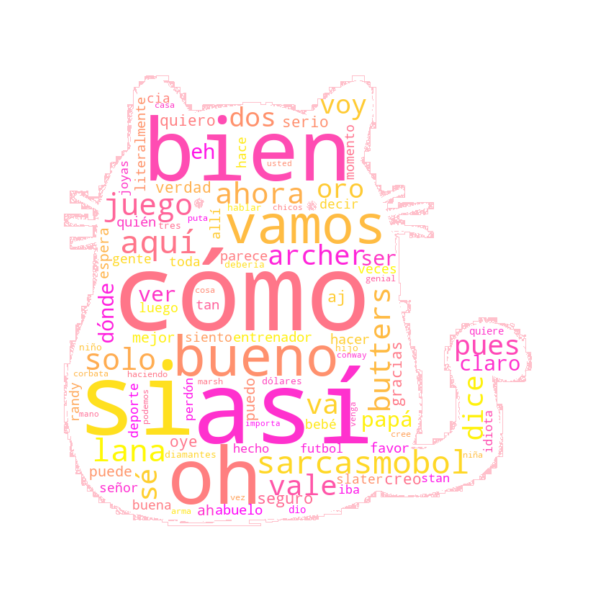

In [47]:


# IMAGEN CON FLOR
  # Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


